In [1]:
#
#
#    A R I M A   Models
# 
# Auto regressive Integrated Moving Average Models
# Note.. these don't usually work well with stock analysis 
# but they work very well for other things.. and they are 
# widely used
#
# It is a generalization of the ARMA Models

In [3]:
#
# Arima models can be quite complex!
#
# - Seasonal Arima models (more coplex)
# - Non seasonal Arima models (simpler)
#   ARIMA(p,d,q)
#   p : Autoregression
#       A model that utilizes the dependent relationship between a current observation and observations over a previous period
#       (basic regression)
#   d : Integrated
#       Differencing of observations (subtracting an observation from an observation at the previous time step) in order to make 
#       the time series stationary
#   q : Dependency
#       A model that yses tge dependency between an obsevation and a residual error from a moving average model applied to lagged
#       observations

In [4]:
#
# ARIMA MODELS work with the idea of stationary datasets which means that
# - the mean of the dataset does not change with time
# - the variance of the dataset does not change with time
# - covariance should also not be a function of time
#   here we consider covariance how fast the variance changes
#
# Notes: 
#   - we says does change in time as in if we take a period big enough we see a contant behaviour
#   - there are mathematical tests to verify if your dataset is stationary
#      e.g. Dicky-Fuller test (see later)
# 
#   - If the dataset is not stationary then we can make it stationary using some: "differencing" approaches
#     Example 1.
#            Original      First Diff       Second Diff
#     t1       10              NA               NA 
#     t2       12              2                NA  
#     t3        8             -4                -6
#     t4       14              6                10 
#     t5        7             -7               -13 
#
# Each differencing cost you one datapoint
#  - If you have seasonin you can differ by seasons, e.g. if you have monthly data, you can differ 
#    with a shift of 12 units (i.e one year)
#  - combining differencing is also common, e.g. first the First diff and then the seasonal Difference..
#
# Q1. Why the analysis of the differenciatied dataset is helpful to analyse the original dataset?


In [5]:
#
#
#  We now assume the DATASET is stationary (for ARIMA analysis)
#

In [6]:
#
#
# CORRELATION AND AUTOCORRELATION PLOTs
#
# Autocorrelation (aka Correlogram) shows the correlation of the time series with itself lagged by X time units
#
# The Y Axis is the correlation and X axis is the number of units of the lag
#
# E.G.
# X=1 and timeseries T0 has length T --> the steps are:
#  - copy T0 to T1
#  - delete the first observation in T0
#  - delete the last observation in T1
#  Now we can calculate the correlation between the 2 series and that gives us the value at X=1 of the Correlogram/Correlation Plot
#  Proceed again removing one value from beginning of T0 and one from end of T0
#
# What you usually get:
#  - Gradual decline: the plot shows higher correlation for lower X and lower correlation for higher X (until it gets to zero)
#  - Sharp Drop-off: large value at first then pretty low (and stable + noise) then goes go zero
#

In [7]:
# GOALS:
#
# - figure out if we want to use the AR (auto regressive) or the MA (Moving average) components of the Arima model (or both)
# - figure out what is the best lag to use
# 
# Note that:
# - using both AR and MA is less common
# - we need to set values for p for AR or q for MA components
#
#

In [8]:
#
# Suggestions:
#
# 1) If the Autocorrelation plot shows positive correlation at lag = 1, that suggests to use the AR component
#
# 2)  If the Autocorrelation plot shows negative correlation at lag = 1, that suggests to use the MA component
#
#
# p : is usually the number of lag observations included in the model
# d : is the number of times that the raw observations are differenced
# q : is the size of the moving averages window, also called the order of moving average
#
#

In [9]:
#
#
#  PARTIAL CORRELATION PLOTS
# 
# These are conditional correlations; i.e. the correlation between 2 variables under the assumption that we know and take 
# into account the values of some other set of variables
#
# For instance, consider the following regression context:
#  Y = response variable
#  X1,X2,X3 are predictors
#
# The partial correlation between y and X3 is the correlation between the variables determined taking into account 
# how both y and X3 are related to X and X2
#
# How does the plot look like:
# - similar to shar drop off; typically a sharp drop off after lag K suggests an AR-K model should be used
# - if there is a gradual decline, it suggests an MA model

In [10]:
#
#
#  MORE HINTS
#
# - Identification of an AR model is often best done with the Partial Autocorrelation Function  (PACF)
# - Identification of an MA model is often best done with the Autocorrelation Function (ACF)
# - Once you have analyzed the data with ACF or PACF you can apply ARIMA or Seasonal ARIMA depending on your original data.
#

In [11]:
#
#
# LET's START
#
# STEPS:
#  - Clean and Visulaize the time series Data
#  - Make the time series stationary
#  - Plot correlation and autocorrelation Charts
#  - Construct the ARIMA Model
#  - Use the mode to make predictions


In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as st
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
df = pd.read_csv("monthly_milk_production.csv")

In [84]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [85]:
#
# Change the column to a shorter name and setup a datetime column
df.columns = ["Month","Milk in Pounds per Cow"]
df.dropna(axis=0, inplace=True)
df.index = pd.to_datetime(df['Month'])
df.head()

,Month,Milk in Pounds per Cow
Month,,
1962-01-01,1962-01,589
1962-02-01,1962-02,561
1962-03-01,1962-03,640
1962-04-01,1962-04,656
1962-05-01,1962-05,727


In [86]:
df.drop(['Month'], axis=1, inplace=True)
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


<Axes: xlabel='Month'>

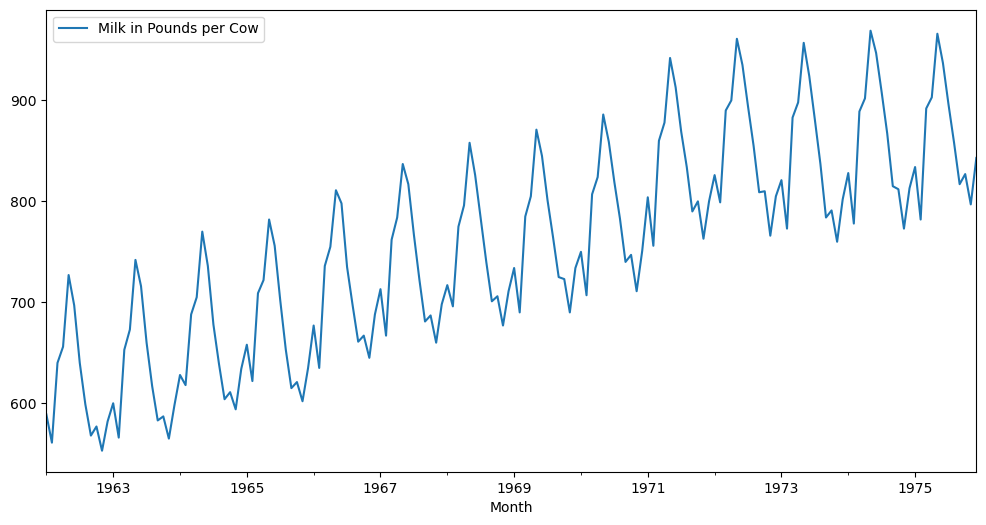

In [87]:
df.plot(figsize=(12,6))

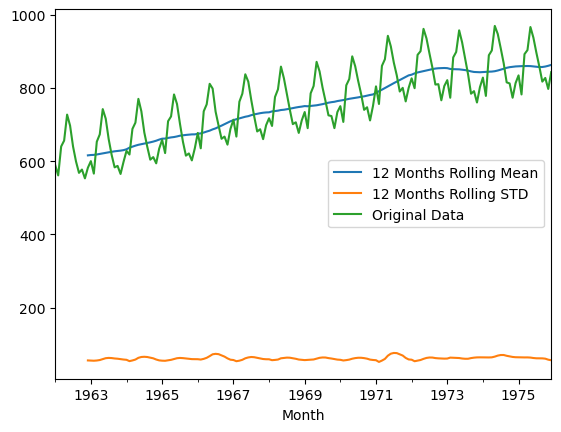

In [88]:
#
#
# START ANALYSING THE DATA
#
tSeries = df['Milk in Pounds per Cow']
#
# we plot the
#  - rolling window mean
#  - rolling window standard devication (to see if it changes much)
#  - the original time series
tSeries.rolling(12).mean().plot(label='12 Months Rolling Mean')
tSeries.rolling(12).std().plot(label='12 Months Rolling STD')
tSeries.plot(label='Original Data')
plt.legend()

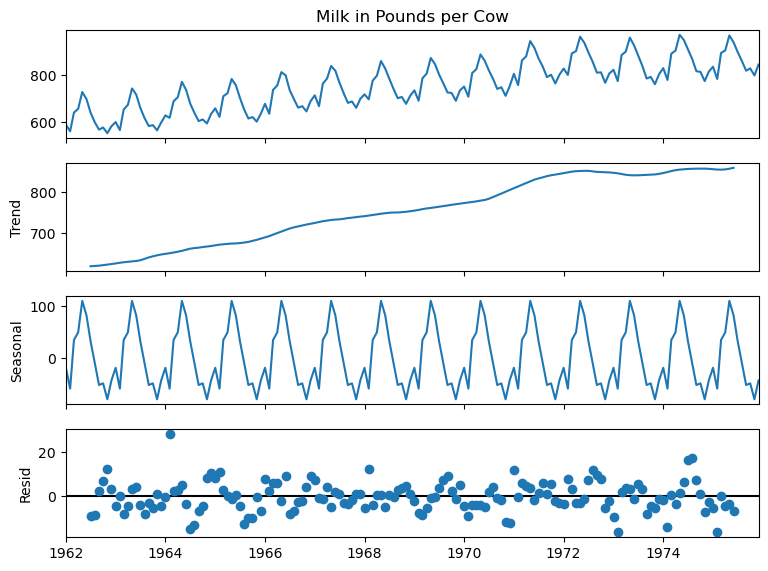

In [37]:
#
# Error Trend Residual Decomposition (ETR Decomposition)
#
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(tSeries)
fig = decomp.plot()
fig.set_size_inches(8,6)

In [44]:
#
#
# 2. TEST STATIONARY AND MAKE IT STATIONARY
#
# It's pretty obvious that the data is not stationary but here we want to use the: Augmented Dickey Fuller test
# This is a statstical test and H0 (null Hypothesis is that the data is non stationary time series)
# and the alternative Hypothesis is that it is stationary
# Decision is taken based on the p value if p < 0.05 makes us reject the null hypothesis
# big p value fails us to reject the null hypothesis
from statsmodels.tsa.stattools import adfuller
#
#
result = adfuller(tSeries)

In [45]:
result

(np.float64(-1.3038115874221274),
 np.float64(0.6274267086030326),
 13,
 154,
 {'1%': np.float64(-3.473542528196209),
  '5%': np.float64(-2.880497674144038),
  '10%': np.float64(-2.576878053634677)},
 np.float64(1115.1730447395112))

In [91]:
def adf_check(t: pandas.core.series.Series, p:float =0.05):
    """
    This function returns the result of Dikey fuller Test on a Time series
    """
    print("Augmented Dilkey-Fuller Test.\n")
    result = adfuller(t)
    labels = ['ADF Test Statstic', 'p-value', '# of lags', '# of Observations']
    for value,label in zip(result, labels):
        print(f"{label:18}  : {value}")
    if result[1] < p:
        print("Strong evidence against Null Hypothesis, i.e. Data has no unit root and it's stationary")
    else:
        print("Weak evidence against Nulll Hyphothesies, i.e. Fail to reject Null Hypothesis, data has unit root.. It is non stationary")
    

In [92]:
adf_check(tSeries)

Augmented Dilkey-Fuller Test.

ADF Test Statstic   : -1.3038115874221274
p-value             : 0.6274267086030326
# of lags           : 13
# of Observations   : 154
Weak evidence against Nulll Hyphothesies, i.e. Fail to reject Null Hypothesis, data has unit root.. It is non stationary


In [93]:
#
#
#  STEP 3 - Differencing
#
# Shift the time series of 1 and start differencing the 2 series
# We now 
# - plot it (we will see tha most of the trend has disappeared) 
# - run adfchek again
df['First Diff'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)
df.head()

,Milk in Pounds per Cow,First Diff
Month,,
1962-01-01,589,NaN
1962-02-01,561,-28.0
1962-03-01,640,79.0
1962-04-01,656,16.0
1962-05-01,727,71.0


Augmented Dilkey-Fuller Test.

ADF Test Statstic   : -3.0549955586530437
p-value             : 0.030068004001787843
# of lags           : 14
# of Observations   : 152
Strong evidence against Null Hypothesis, i.e. Data has no unit root and it's stationary


<Axes: xlabel='Month'>

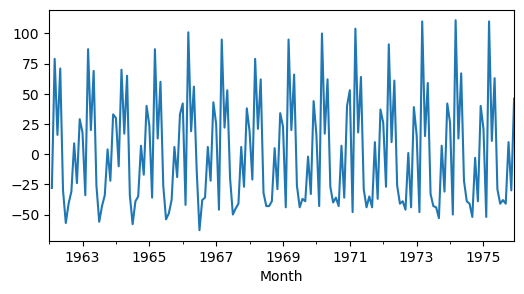

In [68]:
adf_check(df['First Diff'].dropna())
df['First Diff'].plot(figsize=(6,3))         | 

<Axes: xlabel='Month'>

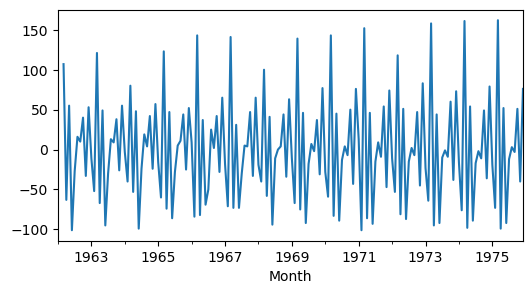

In [70]:
#
# So the data is stationary (you can actually see it..)
# however, should you need to run differencing again you can do it
df['Second Diff'] = df['First Diff'] - df['First Diff'].shift(1)
df['Second Diff'].plot(figsize=(6,3))

<Axes: xlabel='Month'>

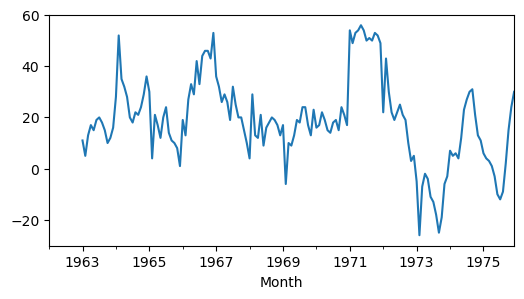

In [72]:
#
# Seasonal Difference can be done by shifting for an entire season (i.e. 12 months in this case)
# 
df['Season Diff'] =  df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)
df['Season Diff'].plot(figsize=(6,3))

In [73]:
adf_check(df['Season Diff'].dropna())
#
# You can see that this does not make the data stationary

Augmented Dilkey-Fuller Test.

ADF Test Statstic   : -2.3354193143593998
p-value             : 0.16079880527711282
# of lags           : 12
# of Observations   : 143
Weak evidence against Nulll Hyphothesies, i.e. Fail to reject Null Hypothesis, data has unit root.. It is non stationary


<Axes: xlabel='Month'>

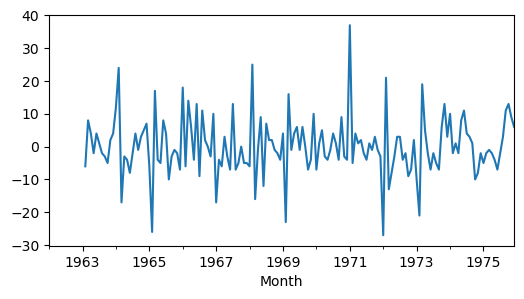

In [95]:
#
#
# You can also combine first difference and season difference
# i.e
# - First Diff First and then Season Difference on First Difference
df['Season First Diff'] =  df['First Diff'] - df['First Diff'].shift(12)
df['Season First Diff'].plot(figsize=(6,3))

In [79]:
adf_check(df['Season First Diff'].dropna())
#
# You can see that this makes the data stationary ( p value is veeery low )

Augmented Dilkey-Fuller Test.

ADF Test Statstic   : -5.038002274921981
p-value             : 1.8654234318788478e-05
# of lags           : 11
# of Observations   : 143
Strong evidence against Null Hypothesis, i.e. Data has no unit root and it's stationary


In [89]:
#
#
# PART 3 AUTO-CORRELATION ADN PARTIAL AUTO-CORRELATION PLOTS
#
#
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Correlation Coefficients: The vertical axis (y-axis) shows the autocorrelation coefficients, which range from -1 (perfect negative correlation) 
#     to +1 (perfect positive correlation). The horizontal line at lag 0 is always 1, as a series is perfectly correlated with itself.
# Lags: The horizontal axis (x-axis) represents the time lag, which is the number of time steps (or units) by which the series is shifted.
# Confidence Intervals: The blue shaded region represents the confidence interval (typically 95% by default). 
#     Any correlation value (the vertical "lollipop" lines) extending outside this blue area is considered statistically significant, 
#     meaning it is unlikely to be due to random chance (white noise).
# 
# Patterns, Trends, and Seasonality: The plot helps identify underlying patterns in the data.
# Seasonality: Significant spikes at regular intervals (e.g., every 4 lags for quarterly data) indicate a repeating pattern.
# Trends: A slowly decaying ACF with significant values across many lags often suggests the presence of a trend.
# Randomness: If all spikes fall within the blue confidence interval, the series is likely white noise (no significant autocorrelation), 
#  which means it is unpredictable. 
#
# Usage in Modeling
# Analysts use the ACF plot to understand the data's structure and select appropriate forecasting models. 
# It is particularly useful for determining the order of a Moving Average (MA) model, as a pure MA process will show a sharp cutoff 
# in the ACF after a specific number of lags. 
    

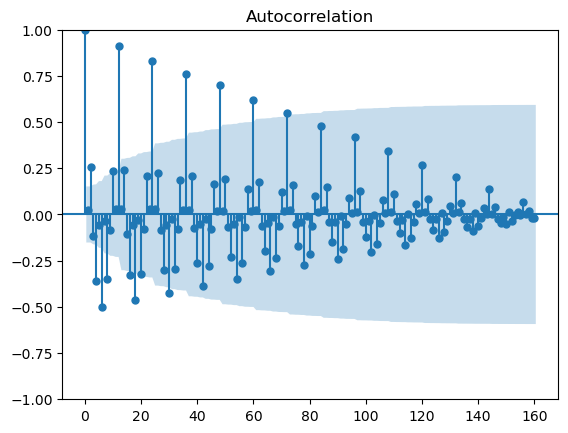

In [103]:
#
#
# so not sure why the plot is different if I don't specify lags, it only shows the first part 
# up to 20/30 points.. so it missess to show the gradual decreasing correlation
#
fig_first = plot_acf(df['First Diff'].dropna(),lags = 160)

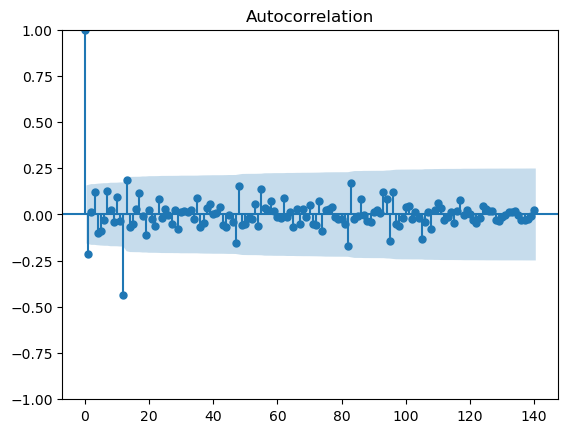

In [105]:
#
# Same here, but need to specify smaller value for lags or the function fails
#
# Anyway, this is an exampl of Sudden Drop Autocorrlation Plot
fig_first = plot_acf(df['Season First Diff'].dropna(), lags=140)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

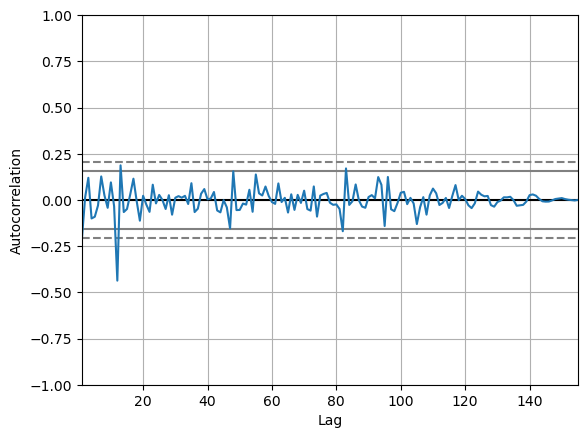

In [106]:
#
# you can also use Pandas to generate autocorrelation plots
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Season First Diff'].dropna())

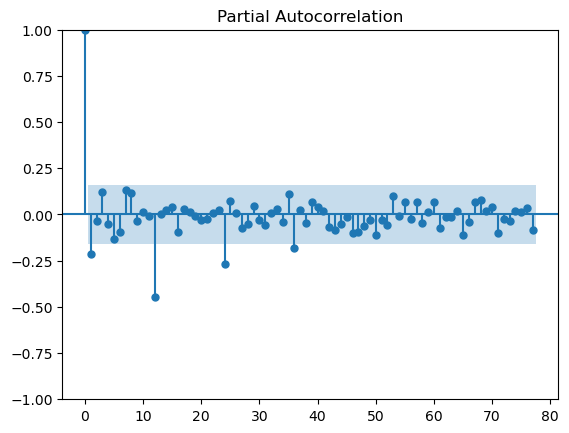

In [113]:
#
# PARTIAL AUTO-CORRELATION
# 
# Quite common to see a sharp drop after k number of lags which suggests you should use some AUTOREGRESSIVE K number model
# a gradual decline suggests to use moving average model
#
# How to Interpret It
# The primary use of the PACF plot is to determine the appropriate order of the autoregressive (AR) component in time series models, 
# such as ARIMA models. 
# Identifying AR Order (p): You look for a "sharp cutoff" point where the significant spikes suddenly drop to zero or 
# within the confidence interval. The lag before this cutoff is typically the suggested order of the AR model.
# Distinguishing from ACF: The key difference from the Autocorrelation Function (ACF) plot is that the PACF isolates the direct effect, 
# whereas the ACF includes both direct and indirect correlations (spillover effects) from all shorter lags. For example, 
# the PACF at lag 3 shows the correlation between today's value and the value from three days ago after accounting for the influence 
# of one and two days ago. 
# By interpreting the PACF plot, analysts can gain insights into the underlying patterns of the data and make informed decisions 
# on model selection for forecasting. 
#
#
# Definitely some difference in the function here from what is shown in the viodes.. 
# Here I can specify a max of 77 lags while in the video it shows up to around 150..
result = plot_pacf(df['Season First Diff'].dropna(), lags=77)

In [123]:
#
#
#
# IMPLEMENTING AN ARIMA MODEL / SEASONAL ARIMA MODEL
#
#
# 
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [125]:
#
#
#  Seasonal Arima model
#
# So the values used for order and seasonal order wre just completely unexplained here...
# apparently it's based on this
# https://people.duke.edu/~rnau/arimrule.htm
# https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima
#
# also, from our AI friends..
# The (p, d, q) Values Explained
# p (AR - Autoregressive): The number of lagged observations (past data points) used to predict the current value. 
#                          Higher 'p' means more history considered.
# d (I - Integrated/Differencing): The number of times the raw data is differenced to make the time series stationary 
# q (MA - Moving Average): The number of lagged forecast errors used to predict the current value. 
# 
# Determine 'p' (AR) & 'q' (MA):
# ACF Plot (Autocorrelation Function): Shows correlation with past values. 
#           A sharp drop-off (cut-off) after lag 'q' suggests the MA(q) order.
# PACF Plot (Partial Autocorrelation Function): Shows correlation with past values after removing the effect of intermediate lags. 
#           A sharp cut-off after lag 'p' suggests the AR(p) order.
#
#
# Because we know the data is seasonal we need to add the seasonal order which is explained as follows:
# It is specified as an iterable or tuple of four components: (P, D, Q, s): 
#  P (Seasonal Autoregressive Order): The order of the seasonal autoregressive part of the model. 
#                                     It accounts for the relationship between the current observation and past observations 
#                                     at the seasonal lags (e.g., the value this month compared to the same month last year).
#  D (Seasonal Integration Order): The degree of seasonal differencing. This is the number of times the data have had past values 
#                                  from the same season subtracted to remove seasonal trends and make the series stationary 
#                                  for the seasonal component. It must be an integer.
#  Q (Seasonal Moving Average Order): The order of the seasonal moving-average part of the model. 
#                                     It incorporates the dependency between the current seasonal residual error 
#                                     and seasonal residual errors from previous time points.
# s (Periodicity/Number of Periods in Season): This integer defines the number of observations within a single season. 
#                                               For example, s would be 12 for monthly data with annual seasonality. 

model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'],order=(0,1,0), seasonal_order=(1,1,1,12))

/Users/valeriogalantini/miniconda3/envs/pyfinance/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/valeriogalantini/miniconda3/envs/pyfinance/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [126]:
results = model.fit()

In [127]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Sun, 07 Dec 2025   AIC                           1074.131
Time:                                      00:11:32   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

<Axes: xlabel='Month'>

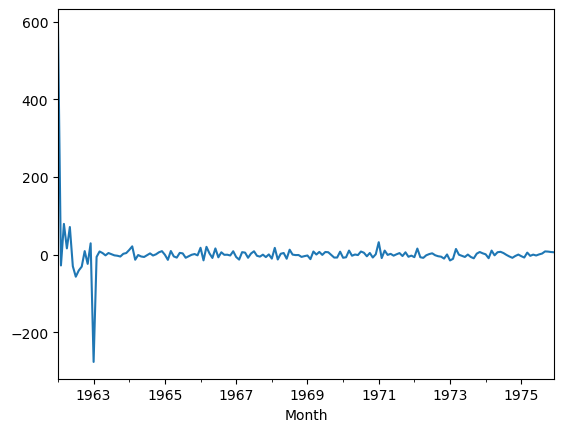

In [129]:
#
# returns the error of what the model would predict on the original data
results.resid.plot()

<Axes: ylabel='Density'>

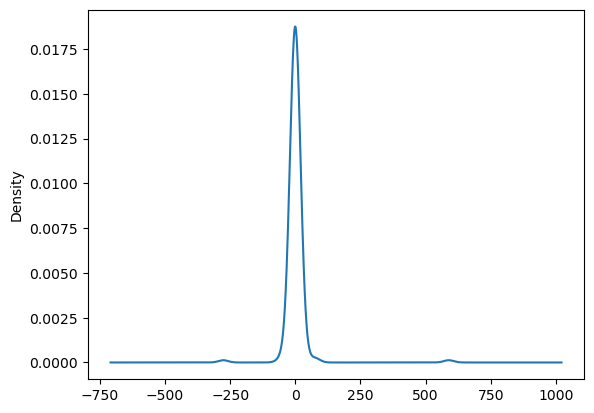

In [131]:
#
#
# If we print the kernel density distribution of the residual (i.e. where they are concentrated)
# we can see that it's mainly around zero which is obviously good
results.resid.plot(kind='kde')

<Axes: xlabel='Month'>

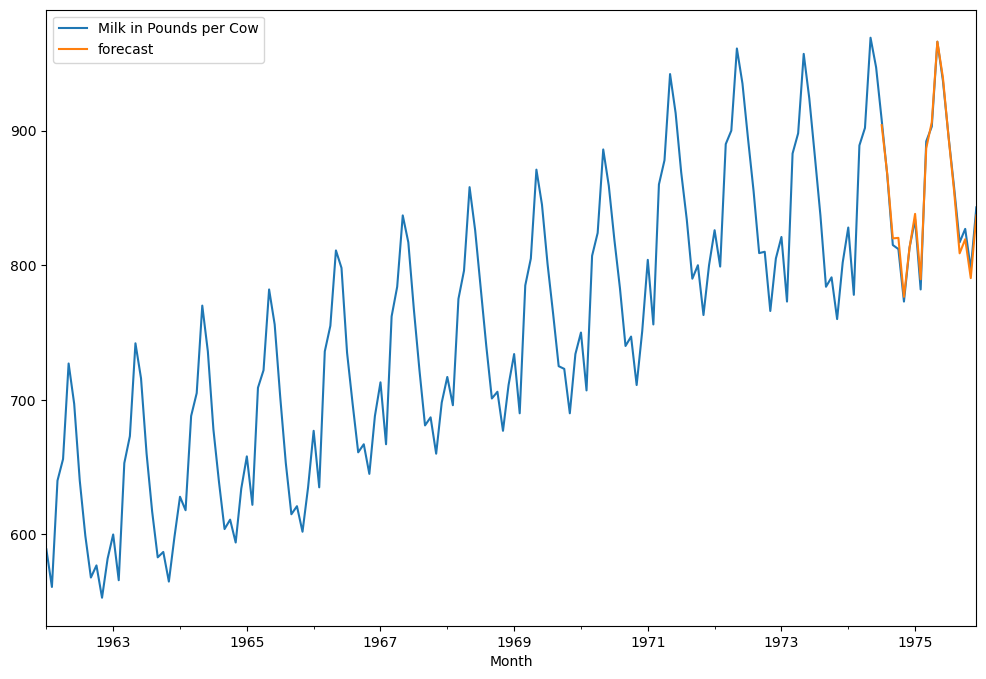

In [136]:
#
#
# FORCASTING
#
# to test the forecasting, we do it on past data points (we don't have new ones.. 
# but of course you coudld fit the model on a subset of datapoints)
# and leave the remaining ones to test (it's actually how you should do it..)
df['forecast'] = results.predict(start=150, end=168)
df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))

In [138]:
#
# Can I predict beyond the points that I have?
# 
# You can but the dataset does not have any index time for the future so you need to create that
df.tail(2)

,Milk in Pounds per Cow,First Diff,Season First Diff,forecast
Month,,,,
1975-11-01,797,-30.0,9.0,790.427530
1975-12-01,843,46.0,6.0,837.063622


In [143]:
#
# Let's create more rows for the index (next 3 years, i.e.36 months)
from pandas.tseries.offsets import DateOffset

future_dates = [ df.index[-1]  + DateOffset(months=x) for x in range(1,36)] 
future_dates[:2]

[Timestamp('1976-01-01 00:00:00'), Timestamp('1976-02-01 00:00:00')]

In [145]:
#
# we create an empty df with the new dates and the same columns as df
# then we concatenate to the original df 
future_df = pd.DataFrame(index=future_dates, columns=df.columns)
final_df = pd.concat([df,future_df])
final_df.tail(3)

/var/folders/gn/kqmw_2pn20v4dptbpqx34zfw0000gn/T/ipykernel_73802/2494943623.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([df,future_df])


,Milk in Pounds per Cow,First Diff,Season First Diff,forecast
1978-09-01,NaN,NaN,NaN,NaN
1978-10-01,NaN,NaN,NaN,NaN
1978-11-01,NaN,NaN,NaN,NaN


<Axes: >

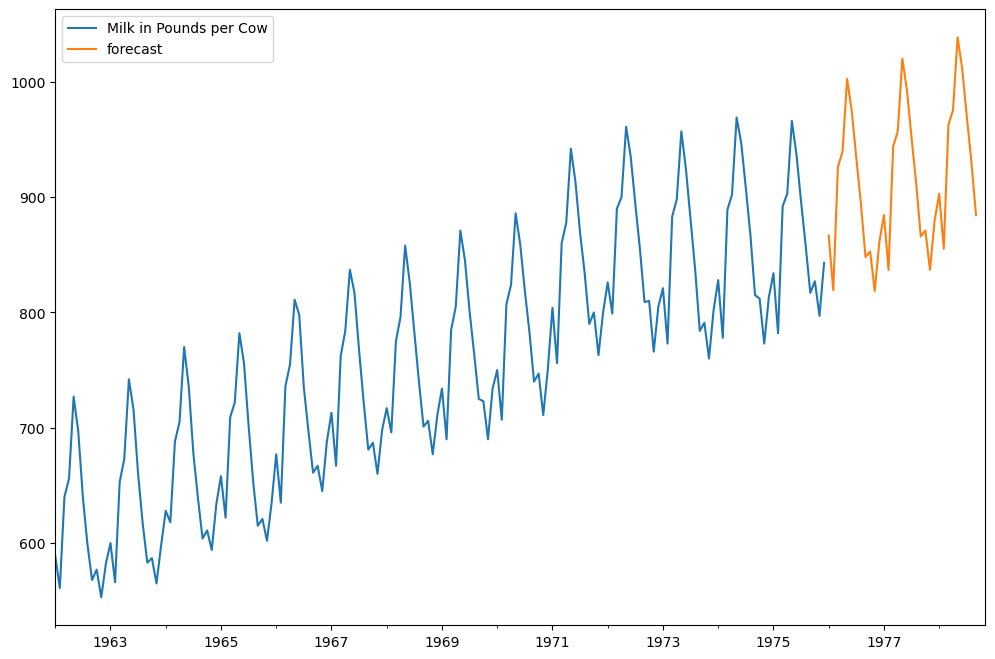

In [148]:
final_df['forecast'] = results.predict(start=168, end=200)
final_df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))

In [ ]:
#
# Why ARIMA is not good for STOCK OPTIONS?
# the reason is that in ARIMA models we consider that the Y value depends on time only but in stock markets 
# there are lots of other external variables that actually influence the price more and give it a more
# chaotic nature (e.g. other traders, news, etc..)
#
#